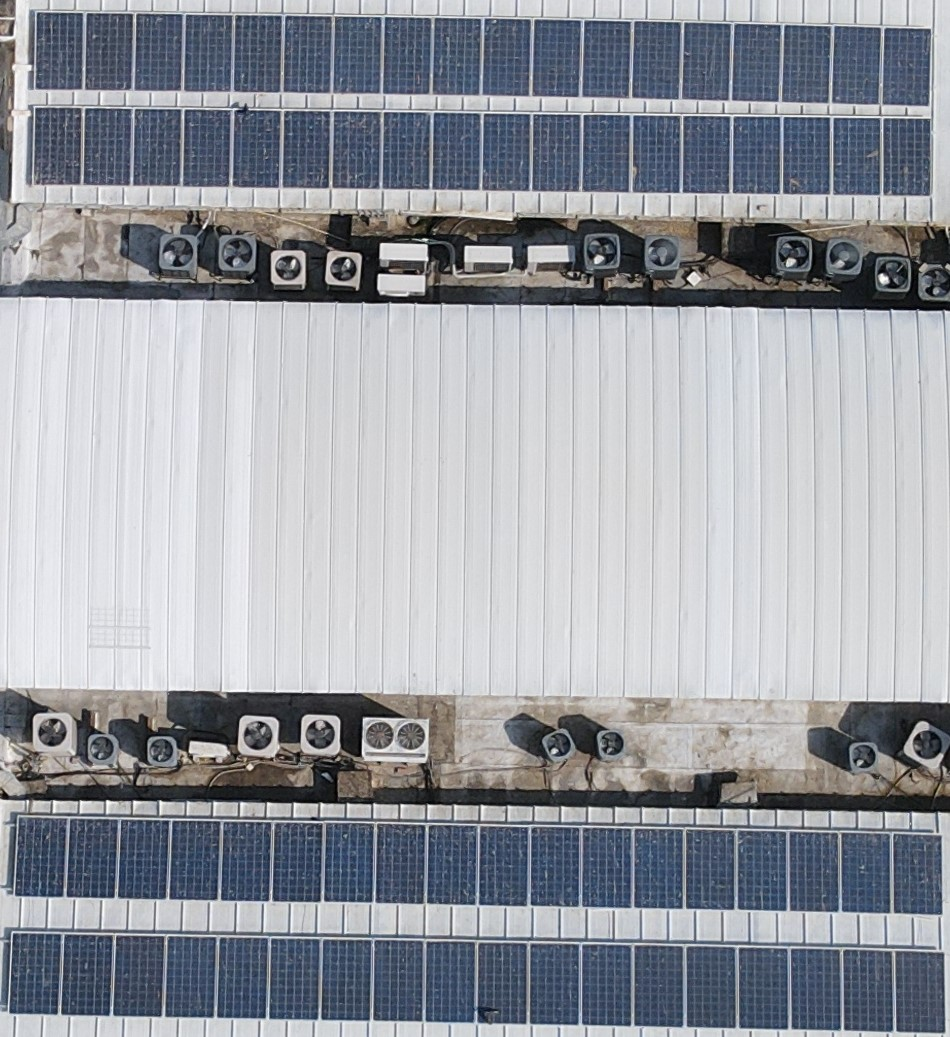

In [12]:
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
    

image2 = cv2.imread('paneles2.jpg')
cv2_imshow(image2)

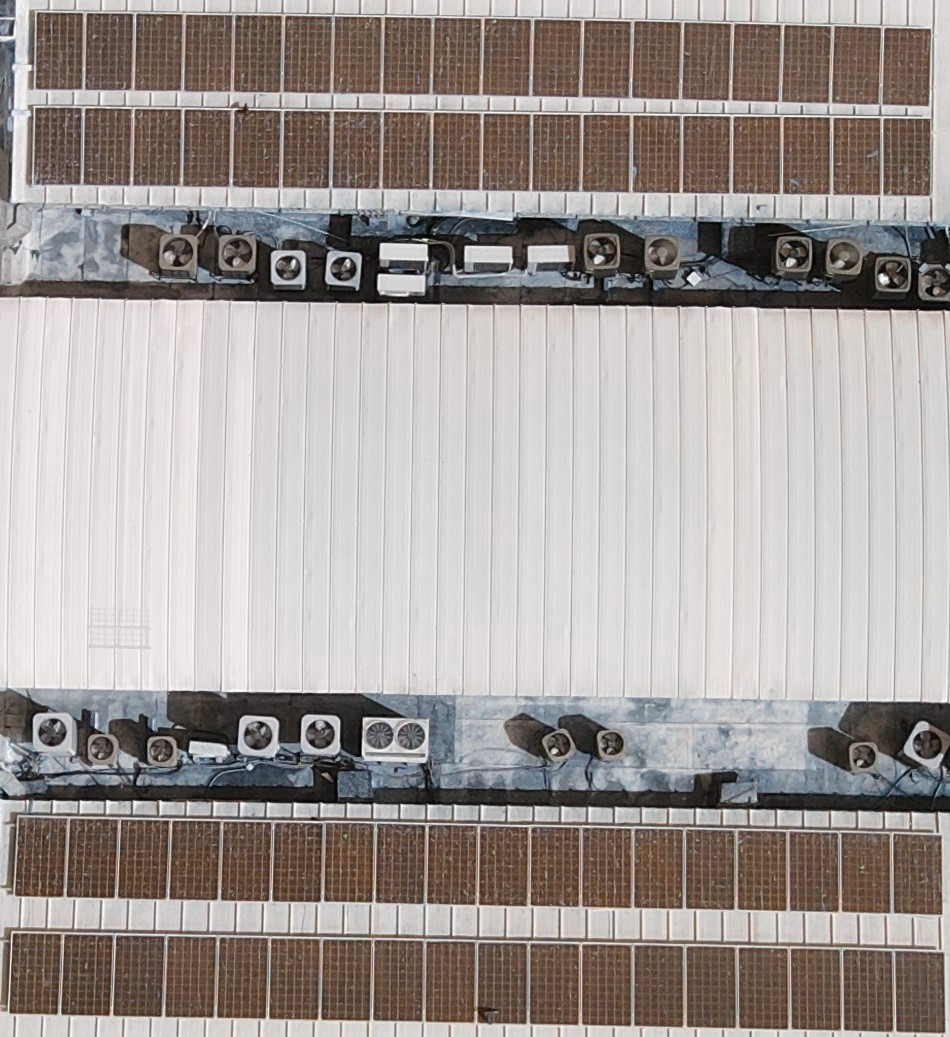

In [32]:
rgb2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
cv2_imshow(rgb2)

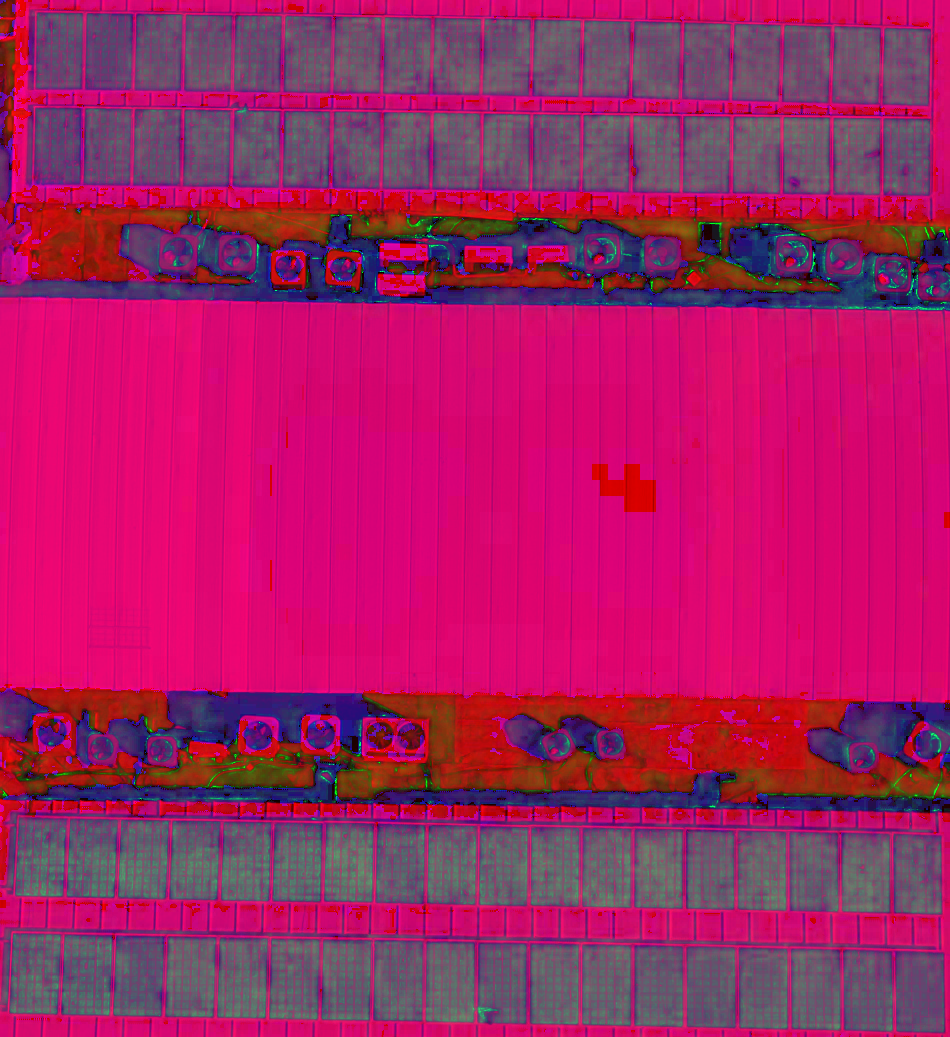

In [33]:
hsv=cv2.cvtColor(image2,  cv2.COLOR_BGR2HSV)
cv2_imshow(hsv)

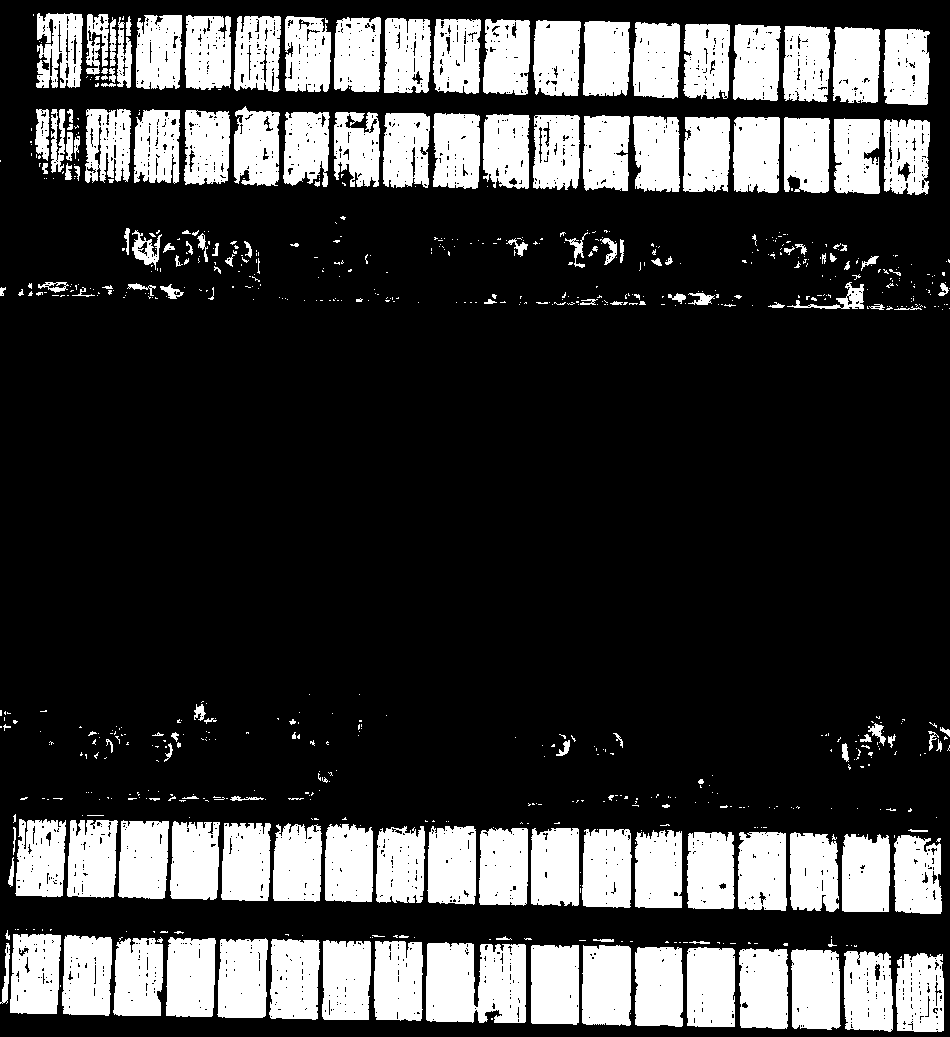

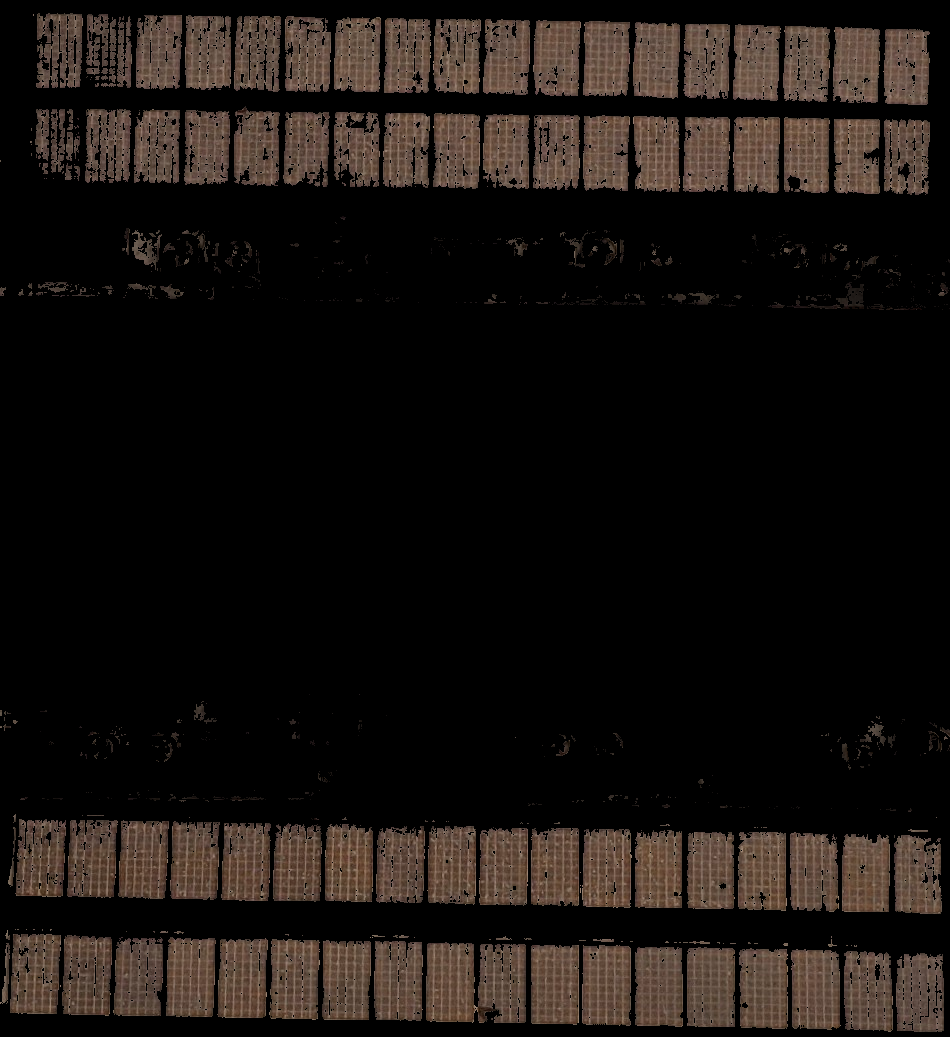

In [61]:
#Azul
lower_B = np.array([105,60,20])
upper_B = np.array([140,255,160])
mask_B=cv2.inRange(hsv,lower_B,upper_B)
RGB_B=cv2.cvtColor(mask_B,cv2.COLOR_BGR2RGB)


cv2_imshow(RGB_B)

blue=cv2.bitwise_and(image2,image2,mask=mask_B)
RGB2_B=cv2.cvtColor(blue,cv2.COLOR_BGR2RGB)
cv2_imshow(RGB2_B)

Hay 74 paneles


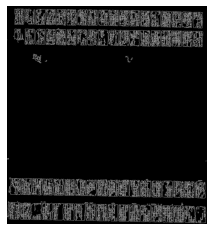

In [84]:
gray=cv2.cvtColor(RGB2_B,cv2.COLOR_RGB2GRAY)
canny = cv2.Canny(gray, threshold1=0, threshold2=358,  L2gradient = True )

cnts,_ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cont = 0

for c in cnts:
  epsilon = 0.08*cv2.arcLength(c,True)
  approx = cv2.approxPolyDP(c,epsilon,True)
  if len(approx)==4:
    cont = cont + 1

print("Hay {} paneles".format(cont))
plt.axis('off')
plt.imshow(canny, cmap="gray")
plt.show()